In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [9]:
X, y = make_circles(n_samples=100, factor=0.9)

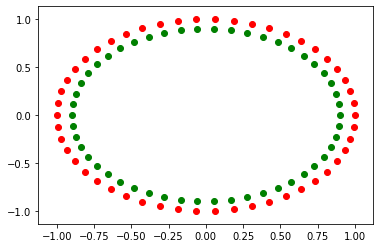

In [10]:
for ix in range(X.shape[0]):
    if y[ix] == 0:
        plt.scatter(X[ix, 0], X[ix, 1], c='r')
    else:
        plt.scatter(X[ix, 0], X[ix, 1], c='g')
plt.show()

In [11]:
# splitting data without using sklearn or any other dependecies
split = int(0.6*X.shape[0])
X_train = X[:split, :]
X_test = X[split:, :]

Y_train = y[:split]
Y_test = y[split:]

print(X_train.shape)
print(Y_train.shape)

(60, 2)
(60,)


# LOGISTIC REGRESSION

In [12]:
ls = LogisticRegression()
ls.fit(X_train, Y_train)
print(ls.score(X_test, Y_test) * 100)

37.5


/home/hardik/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# KNN

In [13]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train) 
print(knn.score(X_test, Y_test) * 100)

62.5


# NEURAL NETWORK (MLP)

Max Accuracy 100.0


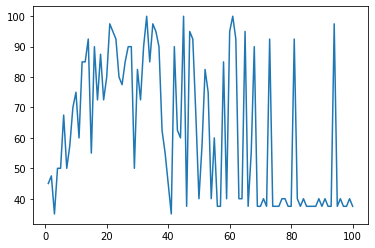

In [15]:
sample = []
accuracy = []
max_accuracy = 0

for i in range(1, 101):
    mlp = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(i), 
                        random_state=100, 
                        activation='logistic', 
                        max_iter=200)
    mlp.fit(X_train, Y_train)
    acc = mlp.score(X_test, Y_test) * 100
    max_accuracy = max(max_accuracy, acc)
    sample.append(i)
    accuracy.append(acc)

print('Max Accuracy', max_accuracy)
plt.plot(sample, accuracy)
plt.show()